In [1]:
#Import necessary packages
import yfinance
import numpy as np
import pandas as pd
import pandas
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

import cufflinks as cf
cf.set_config_file(offline=True)

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Import the AccountManager class. 
from ActMng import AccountManager

In [3]:
starting_capital = 100000
allocation = 0.8

symbol = 'SPY'

long_trend_days = 12
short_trend_days = 6

In [4]:
#Create the function fetch data to get the Yahoo finance data from 2020 to present (if default settings are used)
#for any given stock symbol. The function fetch data should return only the Open and Close values from Yahoo finance dataset.
def fetch_data(symbol:str='SPY', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
#Get the Yahoo finance data from 2020 to present for the defined symbol "SPY"
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


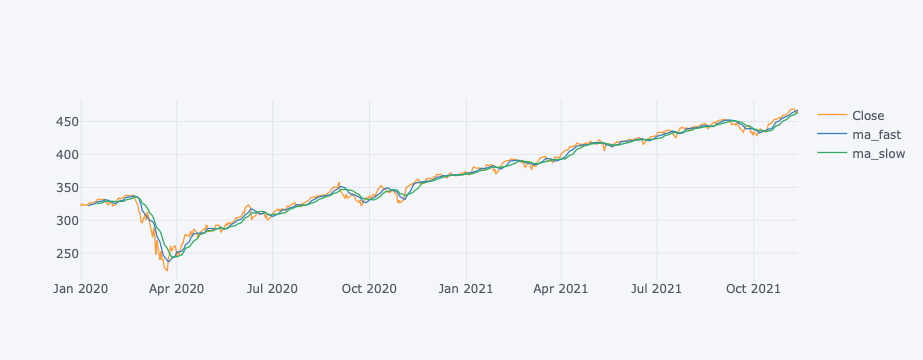

In [5]:
#Define the moving averags for the long and short term trends and add them to the dataframe
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
#Use the .plot() method to generate a plot of the Close price together with the long and short term trend lines.
df[['Close','ma_fast','ma_slow']].iplot()

In [6]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2019-12-31,320.529999,321.859985,NaN,NaN,NaN
2020-01-02,323.540009,324.869995,NaN,NaN,NaN
2020-01-03,321.160004,322.410004,NaN,NaN,NaN
2020-01-06,320.489990,323.640015,NaN,NaN,NaN
2020-01-07,323.019989,322.730011,NaN,NaN,NaN
...,...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0
2021-11-10,465.579987,463.619995,466.756663,462.169998,1.0


In [7]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']
df_trades

,trade_direction,trade
Date,,
2020-01-29,-1,Short
2020-02-07,1,Long
2020-02-25,-1,Short
2020-03-31,1,Long
2020-05-08,-1,Short
2020-05-12,1,Long
2020-05-20,-1,Short
2020-05-21,1,Long
2020-06-17,-1,Short


In [8]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-16,329.700012,330.920013,327.393341,324.670003,1.0,Long
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None
...,...,...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0,None
2021-11-10,465.579987,463.619995,466.756663,462.169998,1.0,None


In [9]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [10]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-16,329.700012,330.920013,327.393341,324.670003,1.0,Long,100295.021096,20000.589038,242.64,242.64,1.0
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None,100544.940000,20000.589038,242.64,0.00,0.0
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None,100387.218076,20000.589038,242.64,0.00,0.0
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None,100396.925750,20000.589038,242.64,0.00,0.0
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None,100489.130134,20000.589038,242.64,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None,136505.079669,25682.854500,236.33,0.00,0.0
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0,None,136138.771054,25682.854500,236.33,0.00,0.0
2021-11-10,465.579987,463.619995,466.756663,462.169998,1.0,None,135250.167946,25682.854500,236.33,0.00,0.0
2021-11-11,465.209991,463.769989,467.408330,462.837496,1.0,None,135285.616004,25682.854500,236.33,0.00,0.0


In [11]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-16,SPY,2020-01-16 00:00:00,At Market Open,BUY,MARKET,329.700012,242.64,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,242.64,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,242.84,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,242.84,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,237.00,1.0
...,...,...,...,...,...,...,...,...
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,223.86,1.0
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,223.90,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,223.90,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,236.33,1.0


In [12]:
results

{'result_df':                   Open       Close     ma_fast     ma_slow  trade_direction  \
 2020-01-16  329.700012  330.920013  327.393341  324.670003              1.0   
 2020-01-17  331.700012  331.950012  328.316676  325.600838              1.0   
 2020-01-21  330.899994  331.299988  328.918340  326.214170              1.0   
 2020-01-22  332.239990  331.339996  329.893336  327.137502              1.0   
 2020-01-23  330.630005  331.720001  330.420003  327.982503              1.0   
 ...                ...         ...         ...         ...              ...   
 2021-11-08  469.700012  468.929993  464.359996  459.879166              1.0   
 2021-11-09  469.320007  467.380005  465.863332  461.228333              1.0   
 2021-11-10  465.579987  463.619995  466.756663  462.169998              1.0   
 2021-11-11  465.209991  463.769989  467.408330  462.837496              1.0   
 2021-11-12  465.119995  467.269989  467.368332  463.559995              1.0   
 
            trades    acc

In [13]:
#Todo:
# Calculate the Absolute Return of our trend-following trading strategy
#absolute_return_tf = #Todo
#rdf = results['result_df']
#final_value = rdf.account_val.iloc[-1]
#initial_value = starting_capital
#absolulte_return_tf = (final_value - initial_value)/ initial_value
# Calculate the CAGR or our trend-following trading strategy
#CAGR_tf = CAGR =(final_value/initial_value)**(1/ (365/long_trend_days)-1)

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
#information_ratio_tf = #Todo
#results['Log returns'] = np.log(results['result_df']['Close']/(results['result_df']['Close'].shift()))
#results['Log returns'].std()
#volatility = results['Log returns'].std()*252**.5
#Plot the equity curve (hint: use 'account_val')
# Todo

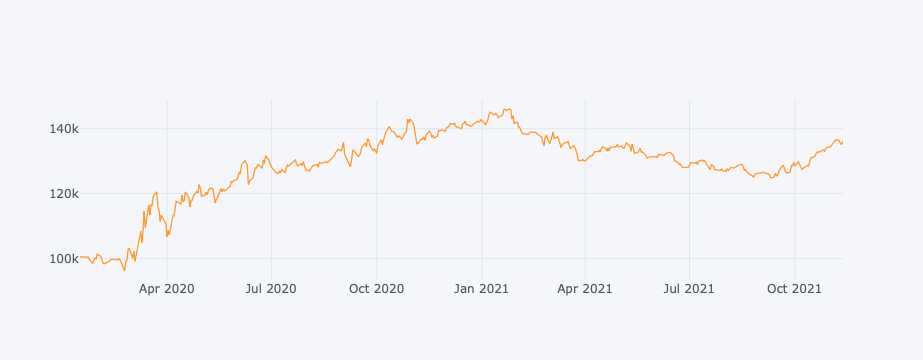

<AxesSubplot:>

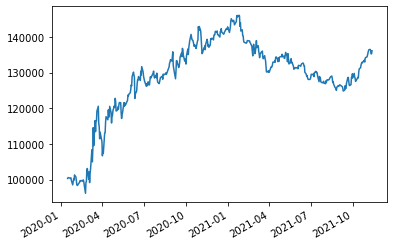

In [14]:
#Todo:

r_df = results['result_df']

# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
#or
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(365/(df.index[-1] - df.index[0]).days))-1


# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252) **0.5)

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.iplot()
#or
r_df.account_val.plot()

In [15]:
#Todo:
# Calculate the Absolute Return of a buy-and-hold strategy in the same period
#absolute_return_bh = #Todo
#[[100000 + (80000/329.700012)*(467.380005 - 329.700012)] - 100000]/100000

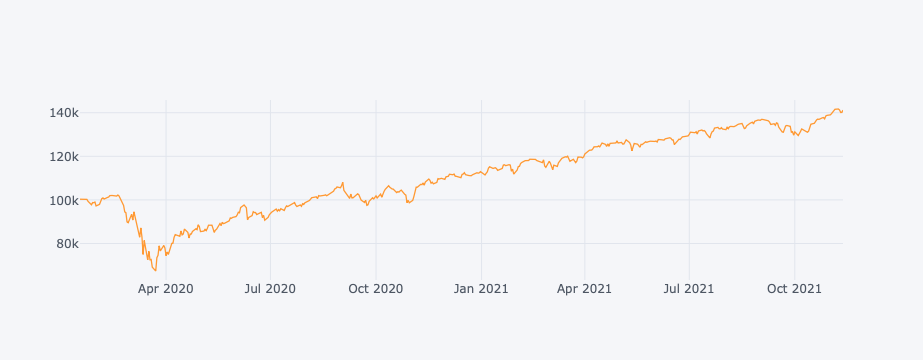

<AxesSubplot:>

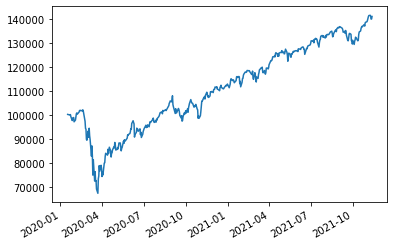

In [16]:
#Todo:
# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = (r_df.Close.iloc[-1]-r_df.Open.iloc[0])/r_df.Open.iloc[0]
# Calculate the CAGR or a buy-and-hold trading strategy
CAGR_bh = ((r_df.Close.iloc[-1]/r_df.Open.iloc[0])**(252/len(df)))-1
#or
CAGR_bh = ((r_df.Close.iloc[-1]/r_df.Open.iloc[0])**(365/(df.index[-1] - df.index[0]).days))-1

# Calculate the IR (Sharpe without RF-rate) of a buy-and-hold trading strategy
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252) **0.5)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).iplot()
#or
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).plot()